In [34]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.cross_validation import cross_val_predict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,f1_score)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import os
# plot feature importance using built-in function
from numpy import loadtxt
from matplotlib import pyplot
%matplotlib inline

In [35]:
os.chdir("C://Users//rumer//Desktop//APRIL20")

In [41]:
df=pd.read_csv("Eng.csv")
dg=pd.read_csv("FinalScore.csv")
dh=pd.read_csv("C://Users//rumer//Desktop//8May2017//EngClass.csv")

In [42]:
dh.tail()

,anon_screen_name,Class,EngStatus
10585,fdf42a806838d5fd65ca53f6001bfce128f2cfdf,NotEngaged,Time<10Mins
10586,fe2efe3deac56a800539b58a6c1590a61dfb1aad,NotEngaged,Time<10Mins
10587,fec738eb1c679f09e30048fd599908d8bfff4ffa,NotEngaged,Time<10Mins
10588,fedd1a4b61388b1ce5d32bf9944e90ce5ee76ff8,NotEngaged,Time<10Mins
10589,ff302cd72d63fb06ca93595b8e5a0e77450d7811,NotEngaged,Time<10Mins


In [45]:
df.head()

,anon_screen_name,Week-1,Week-2,Week-3,Week-4,Week-5,Week-6,Week-7,Week-8,Average
0,1e7ef19f7d2b16cf71044c8064268b5bfd798d16,23228,11818,39958,47862,57961,107289,124361,42704,56897.625
1,d5fd321e713188cffd5cb88dd741644877536e37,64977,60287,46715,69944,48767,40968,41833,49330,52852.625
2,ae8ff88b09212191ade4b9573d4eaba7d01c03a5,25996,58040,72521,82785,74286,16811,35532,47686,51707.125
3,8b7b150270f1989f51973ab13a5fab65ea9c4ad8,36281,27538,65544,74339,41865,74256,44365,43441,50953.625
4,27950f57718267a62f888eb3bd94b2b5e402e931,8733,31443,36985,21970,69419,83628,68442,45822,45805.250


# Week 1

In [46]:
w1=df[['anon_screen_name','Week-1']]

In [48]:
def eng(row):
    if row['Week-1']>=600:
        value='Engaged'
    else:
        value='NotEngaged'
    return value
w1['Week-1']=w1.apply(eng, axis=1)

C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
b=pd.merge(dh,w1,on='anon_screen_name')
b.size()

TypeError: 'numpy.int32' object is not callable

In [61]:
b['accuracy']=b['Class'] == b['Week-1']
b['accuracy'].value_counts()

True     7617
False    2973
Name: accuracy, dtype: int64

# Week 2

In [64]:
w2=df[['anon_screen_name','Week-1','Week-2']]
w2['avg'] = w2[['Week-1','Week-2']].mean(axis=1)


C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [67]:
def eng(row):
    if row['avg']>=600:
        value='Engaged'
    else:
        value='NotEngaged'
    return value
w2['avg']=w2.apply(eng, axis=1)

C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [68]:
w2.head()

,anon_screen_name,Week-1,Week-2,avg
0,1e7ef19f7d2b16cf71044c8064268b5bfd798d16,23228,11818,Engaged
1,d5fd321e713188cffd5cb88dd741644877536e37,64977,60287,Engaged
2,ae8ff88b09212191ade4b9573d4eaba7d01c03a5,25996,58040,Engaged
3,8b7b150270f1989f51973ab13a5fab65ea9c4ad8,36281,27538,Engaged
4,27950f57718267a62f888eb3bd94b2b5e402e931,8733,31443,Engaged


In [70]:
b2=pd.merge(dh,w2,on='anon_screen_name')
b2.head()

,anon_screen_name,Class,EngStatus,Week-1,Week-2,avg
0,1e7ef19f7d2b16cf71044c8064268b5bfd798d16,Engaged,Time >=1 hour,23228,11818,Engaged
1,d5fd321e713188cffd5cb88dd741644877536e37,Engaged,Time >=1 hour,64977,60287,Engaged
2,ae8ff88b09212191ade4b9573d4eaba7d01c03a5,Engaged,Time >=1 hour,25996,58040,Engaged
3,8b7b150270f1989f51973ab13a5fab65ea9c4ad8,Engaged,Time >=1 hour,36281,27538,Engaged
4,27950f57718267a62f888eb3bd94b2b5e402e931,Engaged,Time >=1 hour,8733,31443,Engaged


In [71]:
b2['accuracy']=b2['Class'] == b2['avg']
b2['accuracy'].value_counts()

True     8240
False    2350
Name: accuracy, dtype: int64

# Week 3

In [73]:
w3=df[['anon_screen_name','Week-1','Week-2','Week-3']]
w3['avg'] = w3[['Week-1','Week-2','Week-3']].mean(axis=1)

C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [74]:
def eng(row):
    if row['avg']>=600:
        value='Engaged'
    else:
        value='NotEngaged'
    return value
w3['avg']=w3.apply(eng, axis=1)

C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
w3.head()

,anon_screen_name,Week-1,Week-2,Week-3,avg
0,1e7ef19f7d2b16cf71044c8064268b5bfd798d16,23228,11818,39958,Engaged
1,d5fd321e713188cffd5cb88dd741644877536e37,64977,60287,46715,Engaged
2,ae8ff88b09212191ade4b9573d4eaba7d01c03a5,25996,58040,72521,Engaged
3,8b7b150270f1989f51973ab13a5fab65ea9c4ad8,36281,27538,65544,Engaged
4,27950f57718267a62f888eb3bd94b2b5e402e931,8733,31443,36985,Engaged


In [76]:
b3=pd.merge(dh,w3,on='anon_screen_name')
b3.head()

,anon_screen_name,Class,EngStatus,Week-1,Week-2,Week-3,avg
0,1e7ef19f7d2b16cf71044c8064268b5bfd798d16,Engaged,Time >=1 hour,23228,11818,39958,Engaged
1,d5fd321e713188cffd5cb88dd741644877536e37,Engaged,Time >=1 hour,64977,60287,46715,Engaged
2,ae8ff88b09212191ade4b9573d4eaba7d01c03a5,Engaged,Time >=1 hour,25996,58040,72521,Engaged
3,8b7b150270f1989f51973ab13a5fab65ea9c4ad8,Engaged,Time >=1 hour,36281,27538,65544,Engaged
4,27950f57718267a62f888eb3bd94b2b5e402e931,Engaged,Time >=1 hour,8733,31443,36985,Engaged


In [77]:
b3['accuracy']=b3['Class'] == b3['avg']
b3['accuracy'].value_counts()

True     8719
False    1871
Name: accuracy, dtype: int64

# Week 4

In [78]:
w4=df[['anon_screen_name','Week-1','Week-2','Week-3','Week-4']]
w4['avg'] = w4[['Week-1','Week-2','Week-3','Week-4']].mean(axis=1)

C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [79]:
def eng(row):
    if row['avg']>=600:
        value='Engaged'
    else:
        value='NotEngaged'
    return value
w4['avg']=w4.apply(eng, axis=1)

C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [80]:
b4=pd.merge(dh,w4,on='anon_screen_name')
b4.head()

,anon_screen_name,Class,EngStatus,Week-1,Week-2,Week-3,Week-4,avg
0,1e7ef19f7d2b16cf71044c8064268b5bfd798d16,Engaged,Time >=1 hour,23228,11818,39958,47862,Engaged
1,d5fd321e713188cffd5cb88dd741644877536e37,Engaged,Time >=1 hour,64977,60287,46715,69944,Engaged
2,ae8ff88b09212191ade4b9573d4eaba7d01c03a5,Engaged,Time >=1 hour,25996,58040,72521,82785,Engaged
3,8b7b150270f1989f51973ab13a5fab65ea9c4ad8,Engaged,Time >=1 hour,36281,27538,65544,74339,Engaged
4,27950f57718267a62f888eb3bd94b2b5e402e931,Engaged,Time >=1 hour,8733,31443,36985,21970,Engaged


In [81]:
b4['accuracy']=b4['Class'] == b4['avg']
b4['accuracy'].value_counts()

True     9150
False    1440
Name: accuracy, dtype: int64

# Week 5

In [82]:
w5=df[['anon_screen_name','Week-1','Week-2','Week-3','Week-4','Week-5']]
w5['avg'] = w5[['Week-1','Week-2','Week-3','Week-4','Week-5']].mean(axis=1)

C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [83]:
def eng(row):
    if row['avg']>=600:
        value='Engaged'
    else:
        value='NotEngaged'
    return value
w5['avg']=w5.apply(eng, axis=1)

C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [84]:
b5=pd.merge(dh,w5,on='anon_screen_name')
b5.head()

,anon_screen_name,Class,EngStatus,Week-1,Week-2,Week-3,Week-4,Week-5,avg
0,1e7ef19f7d2b16cf71044c8064268b5bfd798d16,Engaged,Time >=1 hour,23228,11818,39958,47862,57961,Engaged
1,d5fd321e713188cffd5cb88dd741644877536e37,Engaged,Time >=1 hour,64977,60287,46715,69944,48767,Engaged
2,ae8ff88b09212191ade4b9573d4eaba7d01c03a5,Engaged,Time >=1 hour,25996,58040,72521,82785,74286,Engaged
3,8b7b150270f1989f51973ab13a5fab65ea9c4ad8,Engaged,Time >=1 hour,36281,27538,65544,74339,41865,Engaged
4,27950f57718267a62f888eb3bd94b2b5e402e931,Engaged,Time >=1 hour,8733,31443,36985,21970,69419,Engaged


In [85]:
b5['accuracy']=b5['Class'] == b5['avg']
b5['accuracy'].value_counts()

True     9635
False     955
Name: accuracy, dtype: int64

# Week 6

In [86]:
w6=df[['anon_screen_name','Week-1','Week-2','Week-3','Week-4','Week-5','Week-6']]
w6['avg'] = w6[['Week-1','Week-2','Week-3','Week-4','Week-5','Week-6']].mean(axis=1)

C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [87]:
def eng(row):
    if row['avg']>=600:
        value='Engaged'
    else:
        value='NotEngaged'
    return value
w6['avg']=w6.apply(eng, axis=1)

C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [88]:
b6=pd.merge(dh,w6,on='anon_screen_name')
b6.head()

,anon_screen_name,Class,EngStatus,Week-1,Week-2,Week-3,Week-4,Week-5,Week-6,avg
0,1e7ef19f7d2b16cf71044c8064268b5bfd798d16,Engaged,Time >=1 hour,23228,11818,39958,47862,57961,107289,Engaged
1,d5fd321e713188cffd5cb88dd741644877536e37,Engaged,Time >=1 hour,64977,60287,46715,69944,48767,40968,Engaged
2,ae8ff88b09212191ade4b9573d4eaba7d01c03a5,Engaged,Time >=1 hour,25996,58040,72521,82785,74286,16811,Engaged
3,8b7b150270f1989f51973ab13a5fab65ea9c4ad8,Engaged,Time >=1 hour,36281,27538,65544,74339,41865,74256,Engaged
4,27950f57718267a62f888eb3bd94b2b5e402e931,Engaged,Time >=1 hour,8733,31443,36985,21970,69419,83628,Engaged


In [89]:
b6['accuracy']=b6['Class'] == b6['avg']
b6['accuracy'].value_counts()

True     10015
False      575
Name: accuracy, dtype: int64

# Week 7

In [91]:
w7=df[['anon_screen_name','Week-1','Week-2','Week-3','Week-4','Week-5','Week-6','Week-7']]
w7['avg'] = w7[['Week-1','Week-2','Week-3','Week-4','Week-5','Week-6','Week-7']].mean(axis=1)

C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [92]:
def eng(row):
    if row['avg']>=600:
        value='Engaged'
    else:
        value='NotEngaged'
    return value
w7['avg']=w7.apply(eng, axis=1)

C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [93]:
b7=pd.merge(dh,w7,on='anon_screen_name')
b7.head()

,anon_screen_name,Class,EngStatus,Week-1,Week-2,Week-3,Week-4,Week-5,Week-6,Week-7,avg
0,1e7ef19f7d2b16cf71044c8064268b5bfd798d16,Engaged,Time >=1 hour,23228,11818,39958,47862,57961,107289,124361,Engaged
1,d5fd321e713188cffd5cb88dd741644877536e37,Engaged,Time >=1 hour,64977,60287,46715,69944,48767,40968,41833,Engaged
2,ae8ff88b09212191ade4b9573d4eaba7d01c03a5,Engaged,Time >=1 hour,25996,58040,72521,82785,74286,16811,35532,Engaged
3,8b7b150270f1989f51973ab13a5fab65ea9c4ad8,Engaged,Time >=1 hour,36281,27538,65544,74339,41865,74256,44365,Engaged
4,27950f57718267a62f888eb3bd94b2b5e402e931,Engaged,Time >=1 hour,8733,31443,36985,21970,69419,83628,68442,Engaged


In [94]:
b7['accuracy']=b7['Class'] == b7['avg']
b7['accuracy'].value_counts()

True     10369
False      221
Name: accuracy, dtype: int64

# Week 8

In [96]:
w8=df[['anon_screen_name','Week-1','Week-2','Week-3','Week-4','Week-5','Week-6','Week-7','Week-8']]
w8['avg'] = w8[['Week-1','Week-2','Week-3','Week-4','Week-5','Week-6','Week-7','Week-8']].mean(axis=1)

In [97]:
def eng(row):
    if row['avg']>=600:
        value='Engaged'
    else:
        value='NotEngaged'
    return value
w8['avg']=w8.apply(eng, axis=1)

In [98]:
b8=pd.merge(dh,w8,on='anon_screen_name')
b8.head()

,anon_screen_name,Class,EngStatus,Week-1,Week-2,Week-3,Week-4,Week-5,Week-6,Week-7,Week-8,avg
0,1e7ef19f7d2b16cf71044c8064268b5bfd798d16,Engaged,Time >=1 hour,23228,11818,39958,47862,57961,107289,124361,42704,Engaged
1,d5fd321e713188cffd5cb88dd741644877536e37,Engaged,Time >=1 hour,64977,60287,46715,69944,48767,40968,41833,49330,Engaged
2,ae8ff88b09212191ade4b9573d4eaba7d01c03a5,Engaged,Time >=1 hour,25996,58040,72521,82785,74286,16811,35532,47686,Engaged
3,8b7b150270f1989f51973ab13a5fab65ea9c4ad8,Engaged,Time >=1 hour,36281,27538,65544,74339,41865,74256,44365,43441,Engaged
4,27950f57718267a62f888eb3bd94b2b5e402e931,Engaged,Time >=1 hour,8733,31443,36985,21970,69419,83628,68442,45822,Engaged


In [99]:
b8['accuracy']=b8['Class'] == b8['avg']
b8['accuracy'].value_counts()

True     10504
False       86
Name: accuracy, dtype: int64

In [ ]:
w1['Class1']=w1['Week-1']>=1800

In [212]:
Pass.to_csv("PassEng.csv")

In [213]:
Fail.to_csv("FailEng.csv")

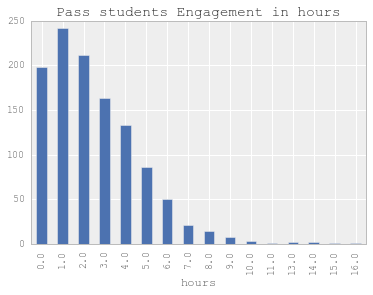

In [247]:
grp=Pass.groupby(['hours'])
grp['anon_screen_name'].count().plot(kind='bar',title='Pass students Engagement in hours')

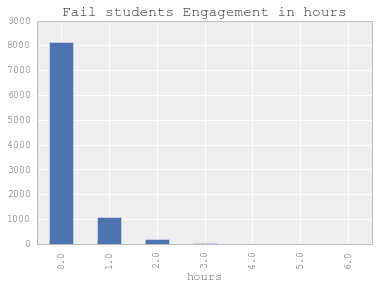

In [248]:
grp=Fail.groupby(['hours'])
grp['anon_screen_name'].count().plot(kind='bar',title='Fail students Engagement in hours')

In [249]:
df.columns

Index([u'anon_screen_name', u'Week-1', u'Week-2', u'Week-3', u'Week-4',
       u'Week-5', u'Week-6', u'Week-7', u'Week-8', u'Average', u'hours',
       u'minutes'],
      dtype='object')

In [292]:
def eng(row):
    if row['minutes']>=60:
        value='Time >=1 hour'
    elif((row['minutes']<60)&(row['minutes']>=30)):
        value='Time<1hour'
    elif ((row['minutes']<30)&(row['minutes']>=20)):
        value='Time<30Mins'
    elif ((row['minutes']<20)&(row['minutes']>=10)):
        value='Time<20Mins'
    elif ((row['minutes']<10)&(row['minutes']>=0)):
        value='Time<10Mins'
    return value
data['EngStatus']=data.apply(eng, axis=1)

In [293]:
data.columns

Index([u'anon_screen_name', u'Week-1', u'Week-2', u'Week-3', u'Week-4',
       u'Week-5', u'Week-6', u'Week-7', u'Week-8', u'Average', u'hours',
       u'minutes', u'Finalgrade', u'FinalScore', u'EngStatus'],
      dtype='object')

In [294]:
m=data.groupby(['FinalScore','EngStatus'])

In [295]:
m['anon_screen_name'].count()

FinalScore  EngStatus    
Fail        Time >=1 hour     540
            Time<10Mins      6290
            Time<1hour        808
            Time<20Mins      1182
            Time<30Mins       634
Pass        Time >=1 hour     811
            Time<10Mins        97
            Time<1hour        132
            Time<20Mins        51
            Time<30Mins        45
Name: anon_screen_name, dtype: int64

In [343]:
Pass['Week-8'].mean()/60


173.54706572769953

In [344]:
def eng(row):
    if row['minutes']>60:
        value='AboveAvgEngaged'
    elif((row['minutes']<=60)&(row['minutes']>=10)):
        value='AverageEngaged'
    else:
        value='BelowAverage'
    return value
data['Class']=data.apply(eng, axis=1)

In [346]:
data.to_csv("EngagmentFinal.csv")

In [357]:
a=data[data['Class']=='BelowAverage']

In [358]:
len(a)

6387

In [362]:
D=data[['anon_screen_name','Class','EngStatus']]

In [363]:
D

,anon_screen_name,Class,EngStatus
0,1e7ef19f7d2b16cf71044c8064268b5bfd798d16,AboveAvgEngaged,Time >=1 hour
1,d5fd321e713188cffd5cb88dd741644877536e37,AboveAvgEngaged,Time >=1 hour
2,ae8ff88b09212191ade4b9573d4eaba7d01c03a5,AboveAvgEngaged,Time >=1 hour
3,8b7b150270f1989f51973ab13a5fab65ea9c4ad8,AboveAvgEngaged,Time >=1 hour
4,27950f57718267a62f888eb3bd94b2b5e402e931,AboveAvgEngaged,Time >=1 hour
5,fc65ebff6919dcccc9e1845a0bea338ee09a8339,AboveAvgEngaged,Time >=1 hour
6,e7eba994233bdc4650c0e2282903866c2d940c81,AboveAvgEngaged,Time >=1 hour
7,d8d8b43c283088db7744598cd10578f425f1f36e,AboveAvgEngaged,Time >=1 hour
8,68592ab6dcadb7a15499b0426bb75b72fcecc84f,AboveAvgEngaged,Time >=1 hour
9,092f57555dff5b3fece68be0c3f5d0da82da0586,AboveAvgEngaged,Time >=1 hour


In [364]:
D.to_csv("EngClass.csv")